# **Features Selection for weather Forecasting**

## 1. Import of the data

Here we load the librairies

In [1]:
# Libraries for working with multidimensional arrays
import numpy as np
import xarray as xr

# Disable warnings for data download via API
import urllib3
urllib3.disable_warnings()

import pandas as pd

from sklearn.preprocessing import StandardScaler

import requests

import seaborn as sns
import matplotlib.pyplot as plt

In [46]:
ds = xr.open_dataset('../../term_project/download4.grib', engine='cfgrib', backend_kwargs={'filter_by_keys': {'edition': 1}})

Can't read index file '../../term_project/download4.grib.923a8.idx'
Traceback (most recent call last):
  File "C:\Users\doria\anaconda3\envs\DEEP LEARNING\lib\site-packages\cfgrib\messages.py", line 547, in from_indexpath_or_filestream
    self = cls.from_indexpath(indexpath)
  File "C:\Users\doria\anaconda3\envs\DEEP LEARNING\lib\site-packages\cfgrib\messages.py", line 429, in from_indexpath
    index = pickle.load(file)
EOFError: Ran out of input


KeyboardInterrupt: 

### 1.2. Converting to pandas DataFrame

In [3]:
df = ds.to_dataframe().reset_index()
df

,time,latitude,longitude,number,step,surface,valid_time,u100,v100,u10n,...,p66.162,p78.162,p76.162,p72.162,p61.162,p62.162,p54.162,p60.162,p63.162,swvl1
0,2022-01-01 00:00:00,38.0,127.00,0,0 days,0.0,2022-01-01 00:00:00,-0.398209,-0.315125,-0.485321,...,-53476.625,-0.002308,-1.594799e+10,-26.867432,2.532435e+09,2.542505e+09,2501724.0,2.514404e+09,2.547636e+09,0.445340
1,2022-01-01 00:00:00,38.0,127.25,0,0 days,0.0,2022-01-01 00:00:00,0.145737,-0.059265,-0.109344,...,-52628.625,-0.002735,-1.575925e+10,-23.179932,2.503107e+09,2.512063e+09,2461660.0,2.474066e+09,2.517195e+09,0.393689
2,2022-01-01 00:00:00,38.0,127.50,0,0 days,0.0,2022-01-01 00:00:00,0.549057,0.033508,0.352570,...,-51572.625,-0.003132,-1.550759e+10,-18.929932,2.491180e+09,2.499120e+09,2445532.0,2.457748e+09,2.504252e+09,0.365400
3,2022-01-01 00:00:00,38.0,127.75,0,0 days,0.0,2022-01-01 00:00:00,0.633041,0.510071,0.490265,...,-50228.625,-0.003468,-1.517624e+10,-14.679932,2.483479e+09,2.490469e+09,2435260.0,2.447295e+09,2.495568e+09,0.333692
4,2022-01-01 00:00:00,38.0,128.00,0,0 days,0.0,2022-01-01 00:00:00,0.869370,1.017883,0.481476,...,-48596.625,-0.003742,-1.476100e+10,-11.242432,2.459886e+09,2.465959e+09,2403324.0,2.415150e+09,2.471058e+09,0.333676
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7771,2022-12-16 18:00:00,36.0,128.00,0,0 days,0.0,2022-12-16 18:00:00,3.642746,-2.031570,2.535751,...,115405.875,0.084276,3.892301e+10,34.351318,2.473745e+09,2.487386e+09,2422650.0,2.435247e+09,2.499824e+09,0.301878
7772,2022-12-16 18:00:00,36.0,128.25,0,0 days,0.0,2022-12-16 18:00:00,3.118332,-3.256180,1.967392,...,114397.875,0.084680,3.867555e+10,35.538818,2.519358e+09,2.533622e+09,2484826.0,2.497735e+09,2.546027e+09,0.278883
7773,2022-12-16 18:00:00,36.0,128.50,0,0 days,0.0,2022-12-16 18:00:00,2.743332,-3.599930,1.720322,...,114221.875,0.084970,3.863360e+10,37.195068,2.521456e+09,2.536112e+09,2487386.0,2.500357e+09,2.548485e+09,0.284315
7774,2022-12-16 18:00:00,36.0,128.75,0,0 days,0.0,2022-12-16 18:00:00,2.945480,-2.873367,1.967392,...,114621.875,0.085420,3.873427e+10,38.788818,2.512117e+09,2.527134e+09,2474330.0,2.487282e+09,2.539506e+09,0.285444


## 2. Data cleaning

### 2.1. Format uniformization

The goal here is to change the time to an increasing value:
YYYY-MM-DD --> time in ms

In [4]:
df['time'] = df['time'].apply(lambda ts: int(ts.timestamp() * 1000))
df['valid_time'] = df['valid_time'].apply(lambda ts: int(ts.timestamp() * 1000))
df

,time,latitude,longitude,number,step,surface,valid_time,u100,v100,u10n,...,p66.162,p78.162,p76.162,p72.162,p61.162,p62.162,p54.162,p60.162,p63.162,swvl1
0,1640995200000,38.0,127.00,0,0 days,0.0,1640995200000,-0.398209,-0.315125,-0.485321,...,-53476.625,-0.002308,-1.594799e+10,-26.867432,2.532435e+09,2.542505e+09,2501724.0,2.514404e+09,2.547636e+09,0.445340
1,1640995200000,38.0,127.25,0,0 days,0.0,1640995200000,0.145737,-0.059265,-0.109344,...,-52628.625,-0.002735,-1.575925e+10,-23.179932,2.503107e+09,2.512063e+09,2461660.0,2.474066e+09,2.517195e+09,0.393689
2,1640995200000,38.0,127.50,0,0 days,0.0,1640995200000,0.549057,0.033508,0.352570,...,-51572.625,-0.003132,-1.550759e+10,-18.929932,2.491180e+09,2.499120e+09,2445532.0,2.457748e+09,2.504252e+09,0.365400
3,1640995200000,38.0,127.75,0,0 days,0.0,1640995200000,0.633041,0.510071,0.490265,...,-50228.625,-0.003468,-1.517624e+10,-14.679932,2.483479e+09,2.490469e+09,2435260.0,2.447295e+09,2.495568e+09,0.333692
4,1640995200000,38.0,128.00,0,0 days,0.0,1640995200000,0.869370,1.017883,0.481476,...,-48596.625,-0.003742,-1.476100e+10,-11.242432,2.459886e+09,2.465959e+09,2403324.0,2.415150e+09,2.471058e+09,0.333676
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7771,1671213600000,36.0,128.00,0,0 days,0.0,1671213600000,3.642746,-2.031570,2.535751,...,115405.875,0.084276,3.892301e+10,34.351318,2.473745e+09,2.487386e+09,2422650.0,2.435247e+09,2.499824e+09,0.301878
7772,1671213600000,36.0,128.25,0,0 days,0.0,1671213600000,3.118332,-3.256180,1.967392,...,114397.875,0.084680,3.867555e+10,35.538818,2.519358e+09,2.533622e+09,2484826.0,2.497735e+09,2.546027e+09,0.278883
7773,1671213600000,36.0,128.50,0,0 days,0.0,1671213600000,2.743332,-3.599930,1.720322,...,114221.875,0.084970,3.863360e+10,37.195068,2.521456e+09,2.536112e+09,2487386.0,2.500357e+09,2.548485e+09,0.284315
7774,1671213600000,36.0,128.75,0,0 days,0.0,1671213600000,2.945480,-2.873367,1.967392,...,114621.875,0.085420,3.873427e+10,38.788818,2.512117e+09,2.527134e+09,2474330.0,2.487282e+09,2.539506e+09,0.285444


The name of the variables is not perfect, a lot of them are not recognizable with the [documentation](https://confluence.ecmwf.int/display/CKB/ERA5%3A+data+documentation), hence we change their name with the corresponding good ones available here:
[https://opus.nci.org.au/display/ERA5/ERA5+Parameter+Shortname+Exceptions](https://opus.nci.org.au/display/ERA5/ERA5+Parameter+Shortname+Exceptions)

In [45]:
from datetime import date

print(date.fromtimestamp(min(df['time'])/1000), date.fromtimestamp(max(df['time'])/1000))

2022-01-01 2022-12-17


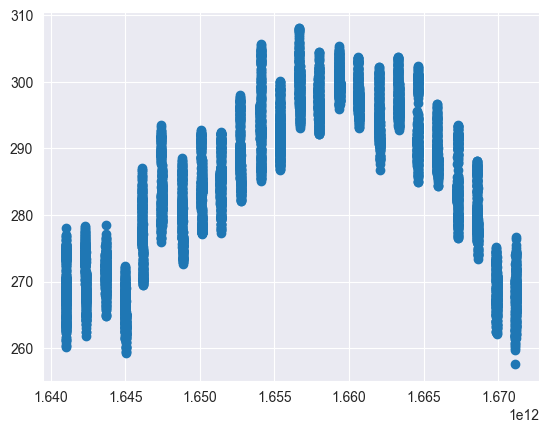

In [37]:
plt.scatter(x=df.time, y=df['2t'])

In [5]:
url = "https://opus.nci.org.au/display/ERA5/ERA5+Parameter+Shortname+Exceptions"
# Récupérer le contenu de la page
response = requests.get(url)
html_content = response.content

# Utiliser pandas pour lire les tables HTML
tables_short_name_correction = pd.read_html(html_content)[0]

In [6]:
tables_short_name_correction

,0,1
0,shortname,netCDF variable name
1,2d,d2m
2,swh1,p140121
3,mwd1,p140122
4,mwp1,p140123
5,swh2,p140124
6,mwd2,p140125
7,mwp2,p140126
8,swh3,p140127
9,mwd3,p140128


We then change the variables names with the corresponding ones here:

In [7]:
def correct_variable_names(df, tables_short_name_correction):
    correct_colnames = []
    for colname in df.columns:
        correct_colname = colname
        for corrected in tables_short_name_correction.values:
            if colname == corrected[1]:
                correct_colname = corrected[0]
        correct_colnames.append(correct_colname)
    df.columns = correct_colnames
    return df

df = correct_variable_names(df, tables_short_name_correction)

## 2.2. Handling missing values

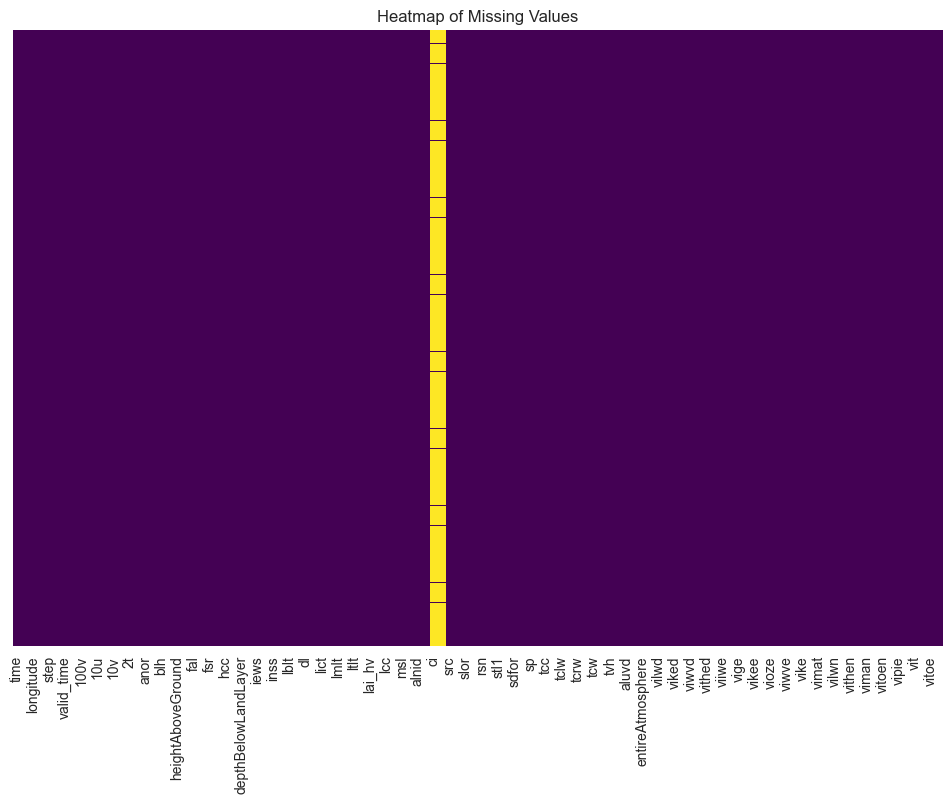

In [8]:
missing_values = df.isnull()

plt.figure(figsize=(12, 8))  # Adjust the size as per your dataset
sns.heatmap(missing_values, cbar=False, yticklabels=False, cmap='viridis')
plt.title('Heatmap of Missing Values')
plt.show()


We then see that the only values that are missing are the ones in the column **ci** and **sst**. Because the majority of the measures doesn't have any values in these corresponding features, we choose to not use them at all.

Moreover, the feature step is not very relevant for our project, we choose to not use it also.

In [9]:
clean_df = df[df.columns.difference(['ci', 'sst', 'step'])]
clean_df

,100u,100v,10u,10v,2d,2t,alnid,alnip,aluvd,aluvp,...,vithee,vithen,vitoe,vitoed,vitoee,vitoen,viwvd,viwve,viwvn,z
0,-0.398209,-0.315125,-0.350479,-0.030411,257.339905,263.283447,0.172058,0.167019,0.063091,0.061069,...,5.790860e+10,-1.326016e+10,2.547636e+09,-1136.445312,8.030880e+10,-1.594799e+10,-0.000082,36.401855,-26.867432,1710.029785
1,0.145737,-0.059265,-0.079971,0.046738,256.119202,262.658447,0.154434,0.150127,0.053387,0.051731,...,5.738851e+10,-1.300011e+10,2.517195e+09,-699.445312,7.973418e+10,-1.575925e+10,-0.000106,33.151855,-23.179932,2912.729004
2,0.549057,0.033508,0.289169,0.037949,257.390686,262.207275,0.140045,0.135875,0.046200,0.044574,...,5.690197e+10,-1.268135e+10,2.504252e+09,1032.554688,7.919311e+10,-1.550759e+10,-0.000111,29.589355,-18.929932,3335.115723
3,0.633041,0.510071,0.398544,0.347519,257.818420,262.269775,0.136032,0.131252,0.042812,0.041095,...,5.645738e+10,-1.228708e+10,2.495568e+09,952.554688,7.870657e+10,-1.517624e+10,-0.000102,26.214355,-14.679932,3532.229004
4,0.869370,1.017883,0.441513,0.548691,256.105530,262.611572,0.136948,0.130932,0.041408,0.039188,...,5.598761e+10,-1.181732e+10,2.471058e+09,-3191.445312,7.819487e+10,-1.476100e+10,-0.000074,23.214355,-11.242432,4424.393066
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7771,3.642746,-2.031570,2.486832,-1.428207,258.056396,267.777588,0.160516,0.154398,0.044276,0.043131,...,9.254017e+10,2.671798e+10,2.499824e+09,3681.753906,1.274701e+11,3.892301e+10,0.000088,140.594238,34.351318,4010.670410
7772,3.118332,-3.256180,1.948746,-2.061996,258.982178,269.482666,0.172922,0.164881,0.053858,0.052012,...,9.240596e+10,2.646003e+10,2.546027e+09,1990.753906,1.273233e+11,3.867555e+10,0.000047,142.875488,35.538818,2091.514160
7773,2.743332,-3.599930,1.703629,-2.262192,258.392334,269.834229,0.169977,0.161326,0.047160,0.045725,...,9.202008e+10,2.643067e+10,2.548485e+09,-1103.246094,1.269249e+11,3.863360e+10,0.000080,145.812988,37.195068,2083.158691
7774,2.945480,-2.873367,1.936050,-1.797348,257.419678,269.650635,0.165064,0.157358,0.043437,0.042261,...,9.189006e+10,2.656489e+10,2.539506e+09,-2175.246094,1.267991e+11,3.873427e+10,0.000093,148.562988,38.788818,2485.561035


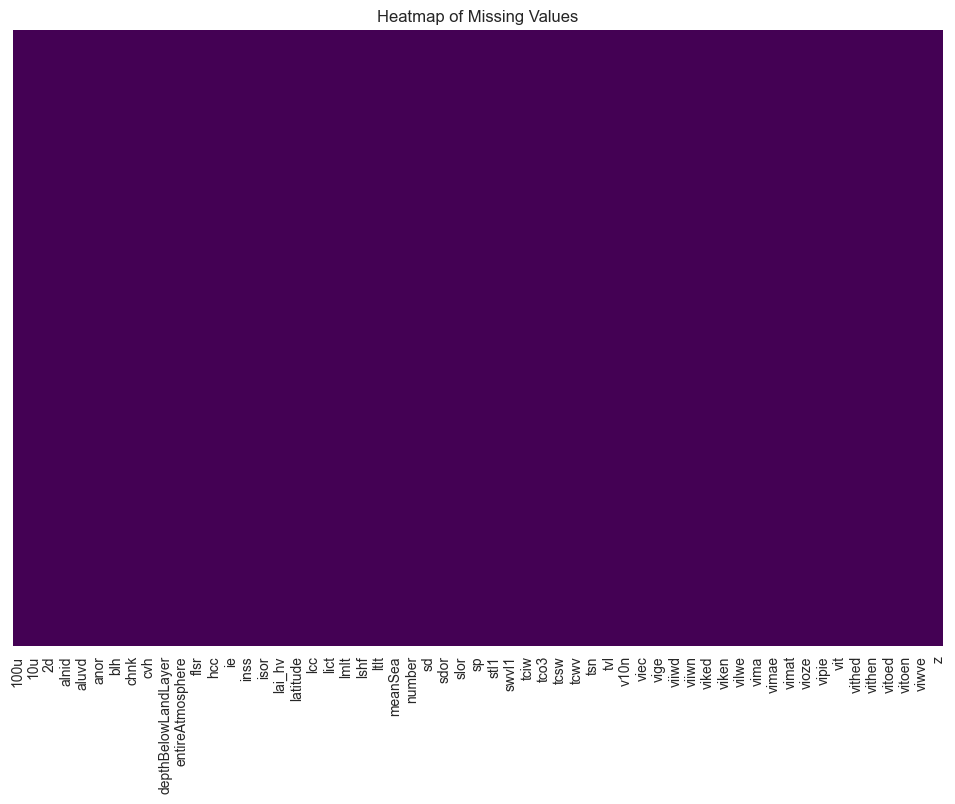

In [10]:
missing_values = clean_df.isnull()

plt.figure(figsize=(12, 8))  # Adjust the size as per your dataset
sns.heatmap(missing_values, cbar=False, yticklabels=False, cmap='viridis')
plt.title('Heatmap of Missing Values')
plt.show()

Here we observe that after removing the corresponding features, the dataset is composed of clean values with no NaN.

### 2.4. Scaling the measures

Here, because we want to make a feature selection, we will compare all the measures between each other. To make the comparison unbiased towards certain values, we decide to scale them using the following formulae:

$$\hat{x_i} = \frac{x_i - \mu_x}{\sigma_x}$$

In [11]:
values_scaled = StandardScaler().fit_transform(clean_df)
clean_df_scale = pd.DataFrame(values_scaled, columns=clean_df.columns)
clean_df_scale

,100u,100v,10u,10v,2d,2t,alnid,alnip,aluvd,aluvp,...,vithee,vithen,vitoe,vitoed,vitoee,vitoen,viwvd,viwve,viwvn,z
0,-0.925100,-0.109040,-0.894748,-0.023890,-1.523244,-1.851153,-0.521331,-0.312179,1.415344,1.598680,...,0.271339,-0.900804,-0.455988,-0.591454,0.285274,-0.865890,-0.458096,-0.624135,-0.418119,-0.775894
1,-0.751501,0.001080,-0.765096,0.030351,-1.615588,-1.904977,-0.867684,-0.712984,0.655215,0.822316,...,0.250519,-0.882892,-0.756612,-0.367230,0.268767,-0.856035,-0.550063,-0.654457,-0.396899,-0.059116
2,-0.622782,0.041009,-0.588172,0.024172,-1.519402,-1.943830,-1.150464,-1.051152,0.092290,0.227356,...,0.231043,-0.860934,-0.884433,0.521457,0.253223,-0.842896,-0.566617,-0.687695,-0.372441,0.192615
3,-0.595978,0.246117,-0.535749,0.241820,-1.487044,-1.938448,-1.229331,-1.160857,-0.173038,-0.061877,...,0.213245,-0.833777,-0.970187,0.480409,0.239246,-0.825596,-0.534429,-0.719184,-0.347983,0.310090
4,-0.520554,0.464676,-0.515155,0.383257,-1.616623,-1.909013,-1.211338,-1.168460,-0.282994,-0.220449,...,0.194441,-0.801419,-1.212239,-1.645871,0.224546,-0.803916,-0.424988,-0.747174,-0.328201,0.841797
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7771,0.364565,-0.847784,0.465142,-1.006634,-1.469042,-1.464132,-0.748156,-0.611643,-0.058397,0.107373,...,1.657662,1.852936,-0.928155,1.880757,1.640099,1.998959,0.200892,0.347978,-0.065818,0.595229
7772,0.197199,-1.374846,0.207244,-1.452230,-1.399007,-1.317295,-0.504359,-0.362905,0.692170,0.845680,...,1.652289,1.835168,-0.471879,1.013107,1.635882,1.986039,0.041789,0.369262,-0.058984,-0.548539
7773,0.077518,-1.522793,0.089762,-1.592980,-1.443628,-1.287020,-0.562235,-0.447266,0.167490,0.323030,...,1.636842,1.833146,-0.447609,-0.574419,1.624435,1.983849,0.169623,0.396669,-0.049453,-0.553519
7774,0.142033,-1.210087,0.201159,-1.266164,-1.517209,-1.302831,-0.658794,-0.541402,-0.124131,0.035064,...,1.631638,1.842391,-0.536276,-1.124461,1.620820,1.989105,0.218365,0.422326,-0.040281,-0.313697


## 3. Correlation computations

The goal here is to compute the values of the correlation between the 2m temperature (named "2t") and all the features to see which one is the more relevant with respect to this variable.

In [12]:
correlation_matrix = clean_df_scale.corr()
temperature_correlations = correlation_matrix['2t']

In [13]:
temperature_correlations.apply(lambda r: np.sqrt(r**2)).sort_values(ascending=False)

2t                   1.000000
stl1                 0.983015
skt                  0.977760
2d                   0.910835
lmlt                 0.869121
                       ...   
entireAtmosphere          NaN
heightAboveGround         NaN
meanSea                   NaN
number                    NaN
surface                   NaN
Name: 2t, Length: 113, dtype: float64

## 4. Feature important using RandomForestRegressor

In [16]:
from sklearn.ensemble import RandomForestRegressor

# Assuming 'temperature' is your target variable
X = clean_df_scale.drop('2t', axis=1)
y = clean_df_scale['2t']

model = RandomForestRegressor()
model.fit(X, y)

RandomForestRegressor()

In [28]:
feature_importances_all = pd.Series(model.feature_importances_, index=X.columns)
feature_importances_all = feature_importances_all.sort_values(ascending=False)
feature_importances_all

stl1                   0.867541
skt                    0.113921
2d                     0.005204
tcwv                   0.001592
tcw                    0.001406
                         ...   
surface                0.000000
depthBelowLandLayer    0.000000
number                 0.000000
meanSea                0.000000
entireAtmosphere       0.000000
Length: 112, dtype: float64

## 5. Results interpretation

In [18]:
import requests

# URL de la page web
url = "https://confluence.ecmwf.int/display/CKB/ERA5%3A+data+documentation#heading-Parameterlistings"

# Récupérer le contenu de la page
response = requests.get(url)
html_content = response.content

# Utiliser pandas pour lire les tables HTML
tables_variable_translation = pd.read_html(html_content)
variables = pd.concat([t for t in tables_variable_translation[4:4+13]])

In [19]:
variables

,count,name,units,Variable name in CDS,shortName,paramId,an,fc,Layer,Range,variable name in CDS,native grid
0,1.0,Lake cover,(0 - 1),lake_cover,cl,26.0,x,x,NaN,NaN,NaN,NaN
1,2.0,Lake depth,m,lake_depth,dl,228007.0,x,x,NaN,NaN,NaN,NaN
2,3.0,Low vegetation cover,(0 - 1),low_vegetation_cover,cvl,27.0,x,NaN,NaN,NaN,NaN,NaN
3,4.0,High vegetation cover,(0 - 1),high_vegetation_cover,cvh,28.0,x,NaN,NaN,NaN,NaN,NaN
4,5.0,Type of low vegetation,~,type_of_low_vegetation,tvl,29.0,x,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
11,12.0,Divergence,s**-1,NaN,d,155.0,x,x,NaN,NaN,NaN,T639 (T319)
12,13.0,Ozone mass mixing ratio,kg kg**-1,NaN,o3,203.0,x,x,NaN,NaN,NaN,N320 (N160)
13,14.0,Specific cloud liquid water content,kg kg**-1,NaN,clwc,246.0,x,x,NaN,NaN,NaN,N320 (N160)
14,15.0,Specific cloud ice water content,kg kg**-1,NaN,ciwc,247.0,x,x,NaN,NaN,NaN,N320 (N160)


In [22]:
nt_variables = variables[variables.units == "K"]
nt_variables[['name', 'shortName']]

,name,shortName
2,Lake mix-layer temperature,lmlt
4,Lake bottom temperature,lblt
5,Lake total layer temperature,ltlt
7,Lake ice temperature,lict
24,Sea surface temperature,sst
25,Ice temperature layer 1,istl1
26,Ice temperature layer 2,istl2
27,Ice temperature layer 3,istl3
28,Ice temperature layer 4,istl4
39,Soil temperature level 11,stl1


In [35]:
var_name = {shortName:name for name, shortName in variables[['name', 'shortName']].values}
var_name

{'cl': 'Lake cover',
 'dl': 'Lake depth',
 'cvl': 'Low vegetation cover',
 'cvh': 'High vegetation cover',
 'tvl': 'Type of low vegetation',
 'tvh': 'Type of high vegetation',
 'slt': 'Soil type1',
 'sdfor': 'Standard deviation of filtered subgrid orography',
 'z': 'Geopotential1',
 'sdor': 'Standard deviation of orography',
 'isor': 'Anisotropy of sub-gridscale orography',
 'anor': 'Angle of sub-gridscale orography',
 'slor': 'Slope of sub-gridscale orography',
 'lsm': 'Land-sea mask',
 'cin': 'Convective inhibition',
 'zust': 'Friction velocity',
 'lmlt': 'Lake mix-layer temperature',
 'lmld': 'Lake mix-layer depth',
 'lblt': 'Lake bottom temperature',
 'ltlt': 'Lake total layer temperature',
 'lshf': 'Lake shape factor',
 'lict': 'Lake ice temperature',
 'licd': 'Lake ice depth',
 'aluvp': 'UV visible albedo for direct radiation',
 'dndzn': 'Minimum vertical gradient of refractivity inside trapping layer',
 'aluvd': 'UV visible albedo for diffuse radiation',
 'dndza': 'Mean vertical

In [52]:
i = 0
total_info = 0
for name, value in feature_importances_all.items():
    print(i)
    try:
        print(f"Name: {var_name[name]}\nValue:\t{value}")
    except:
        print(name, value)
    total_info += value
    print(f"Total information taken: {total_info}\n---------------")
    i +=1


0
Name: Soil temperature level 11
Value:	0.867541325852897
Total information taken: 0.867541325852897
---------------
1
Name: Skin temperature
Value:	0.11392130559445043
Total information taken: 0.9814626314473475
---------------
2
Name: 2 metre dewpoint temperature
Value:	0.005204066697512818
Total information taken: 0.9866666981448603
---------------
3
Name: Total column water vapour
Value:	0.0015917528322368037
Total information taken: 0.9882584509770971
---------------
4
Name: Total column water
Value:	0.0014056835506797128
Total information taken: 0.9896641345277768
---------------
5
Name: Mean sea level pressure
Value:	0.0007391841839909783
Total information taken: 0.9904033187117678
---------------
6
time 0.0005842606091195861
Total information taken: 0.9909875793208873
---------------
7
valid_time 0.0005715454526467384
Total information taken: 0.991559124773534
---------------
8
Name: Boundary layer height
Value:	0.0004635448591539721
Total information taken: 0.992022669632688


## 6. PCA point of view

In [14]:
# Importing the PCA object
from sklearn.decomposition import PCA

# Instantiation of the PCA object
acp = PCA(svd_solver='full')
acp_coord = acp.fit_transform(clean_df_scale)

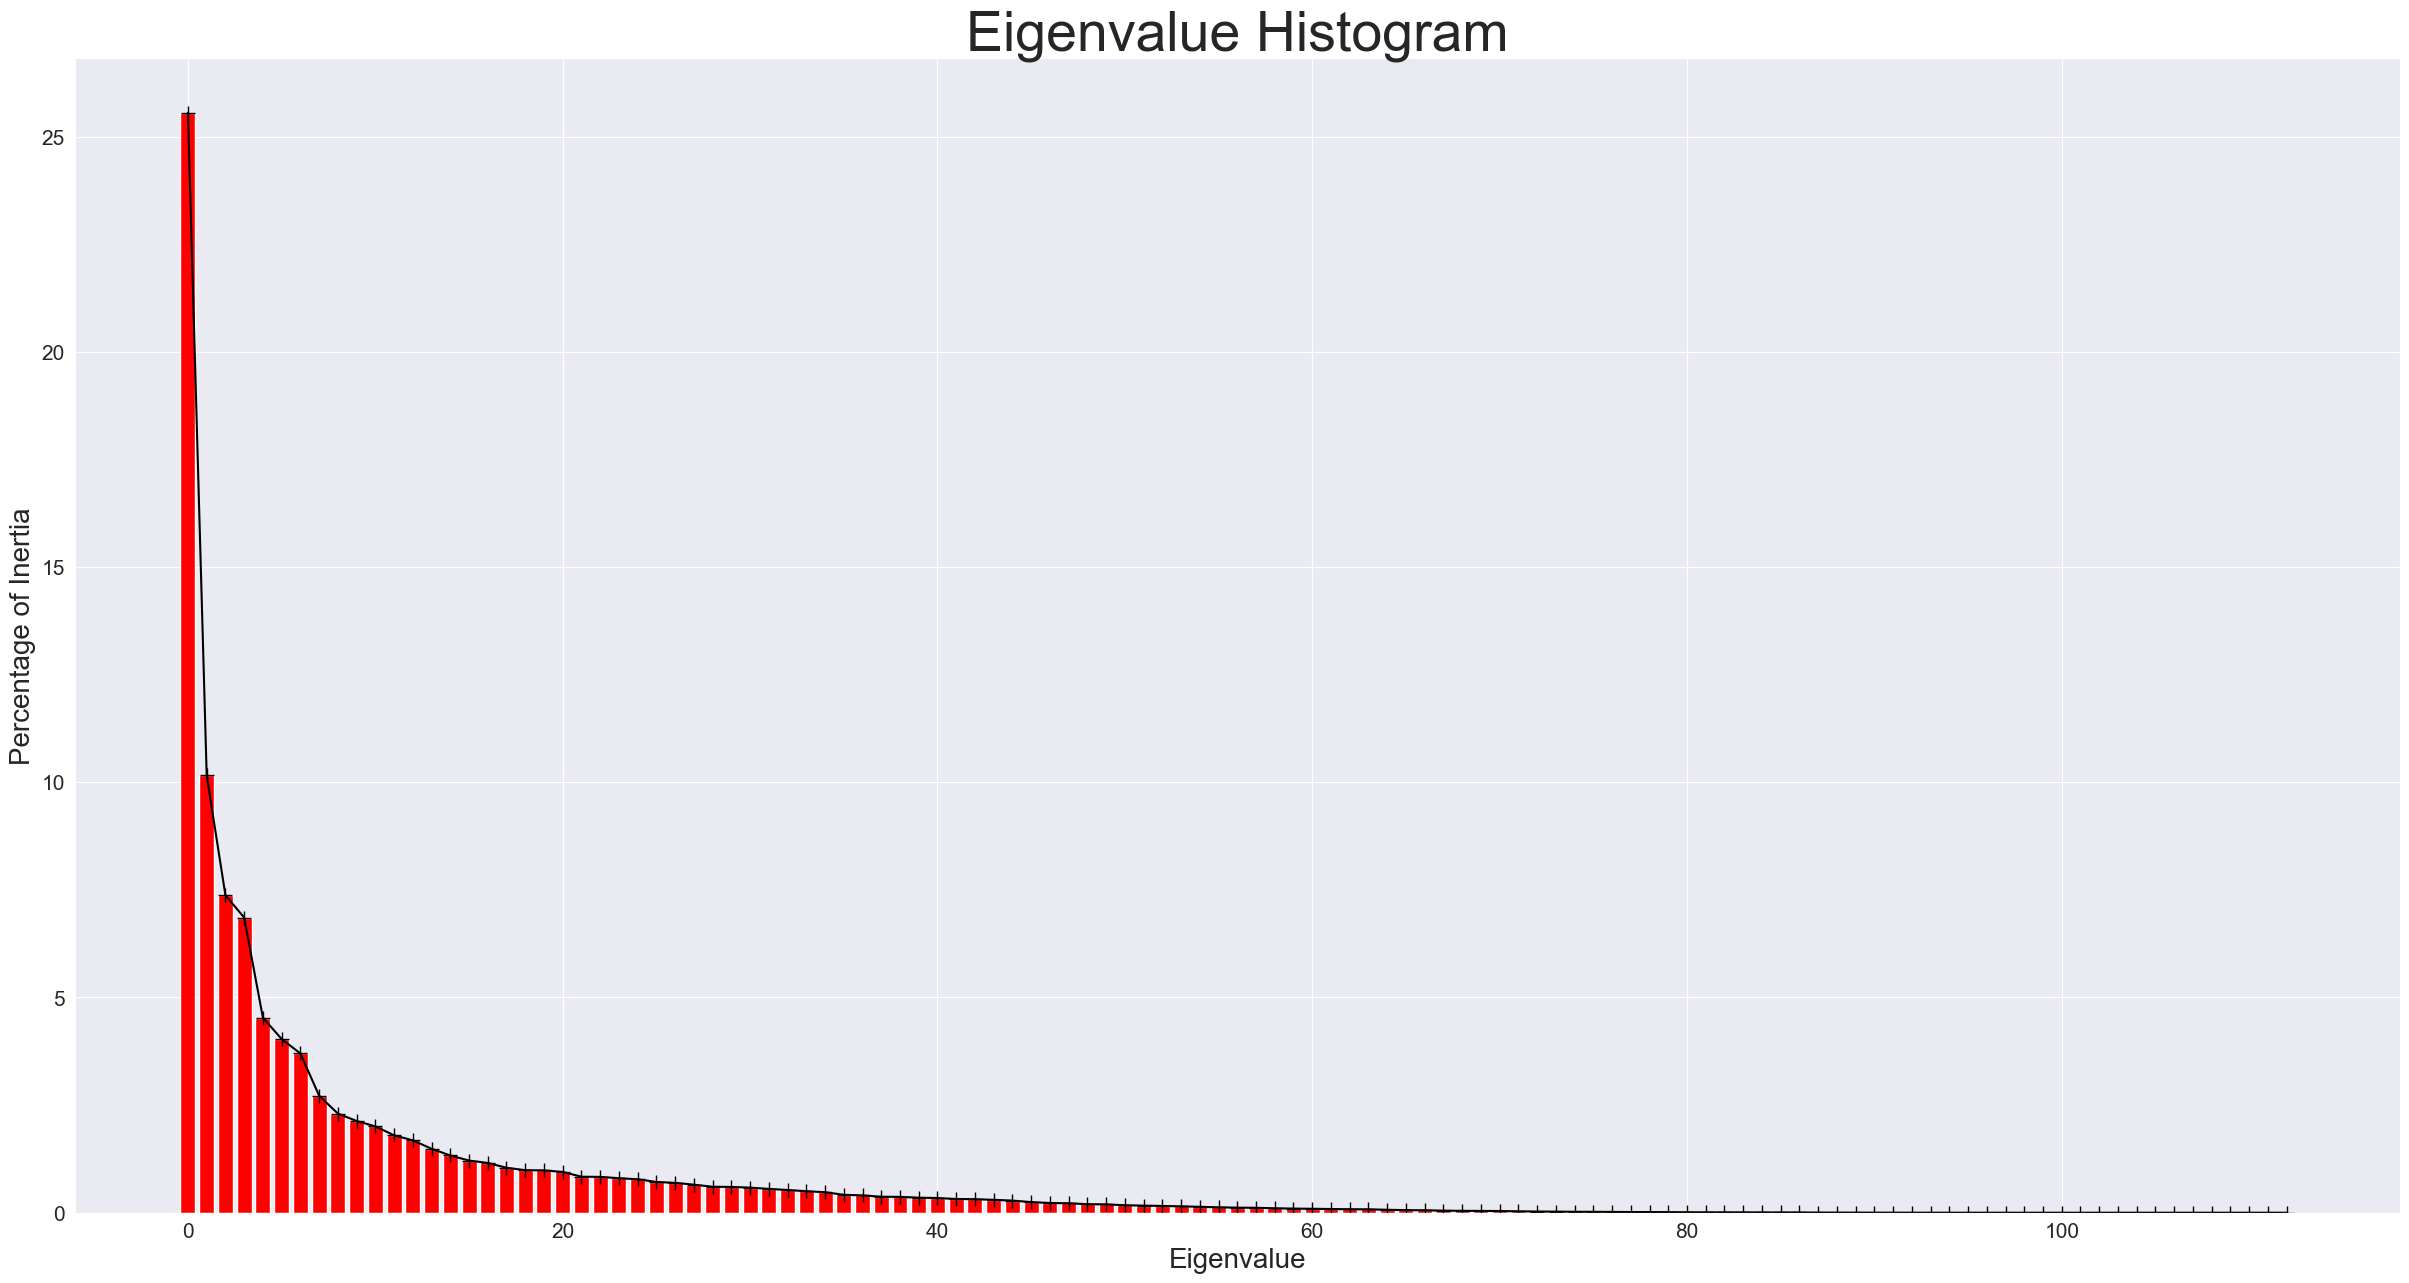

In [15]:
# Number of components in the PCA
n = acp.n_components_

# Variance of each components
variance = acp.explained_variance_

# Readjusting the Eigenvalues of each dimensions
eigenvalues = variance*(len(clean_df_scale)-1)/len(clean_df_scale)

# Bar plot of each Eigenvalue's percentage
fig, ax = plt.subplots(figsize=(30, 15))

ax.bar(range(n), eigenvalues/sum(eigenvalues) * 100, color='r')
ax.plot(eigenvalues/sum(eigenvalues) * 100, marker='+', color='black', ms=10)
plt.title("Eigenvalue Histogram", fontsize = 40)
plt.xticks(fontsize= 15)
plt.yticks(fontsize= 15)
plt.ylabel("Percentage of Inertia", fontsize = 20)
plt.xlabel("Eigenvalue", fontsize = 20)
plt.show()

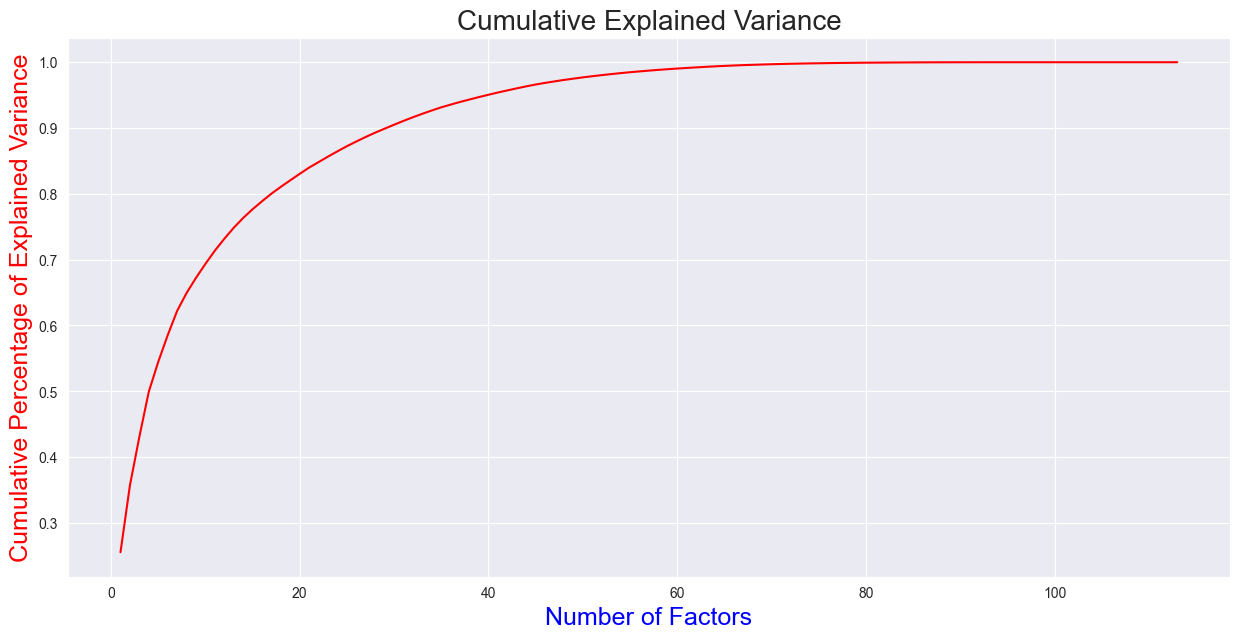

In [16]:
plt.figure(figsize=(15,7))

plt.plot(np.arange(1, n+1),
         np.cumsum(acp.explained_variance_ratio_),
         color='red')
plt.title("Cumulative Explained Variance", fontsize= 20)
plt.ylabel("Cumulative Percentage of Explained Variance", fontsize = 18, color ='red')
plt.xlabel("Number of Factors", fontsize = 18, color = 'blue')
#plt.xticks(np.arange(1, n+1))
plt.show()

In [17]:
variance = acp.explained_variance_
eig = variance*(len(clean_df_scale)-1)/len(clean_df_scale)
number_of_components = 0
for eigenvalue in eig:
    if eigenvalue > 1:
        number_of_components += 1
print("The number of retained dimensions is: ", number_of_components)

The number of retained dimensions is:  21


In [18]:
threshold = 1 + 2 * np.sqrt((len(clean_df_scale.columns) - 1) / (len(clean_df_scale) - 1))
print("The threshold is: ", threshold)
number_of_components = 0
for eigenvalue in eig:
    if eigenvalue > threshold:
        number_of_components += 1
print("The number of retained dimensions is: ", number_of_components)

The threshold is:  1.2400428686258667
The number of retained dimensions is:  16


In [29]:
nb_composante = 5
acp = PCA(n_components=nb_composante)
acp_coord = acp.fit_transform(clean_df_scale)

In [30]:
variance = acp.explained_variance_
valpropre = variance*(len(clean_df_scale)-1)/len(clean_df_scale)
vp_mat=acp.components_.T
sqrt_eigval = np.sqrt(valpropre)

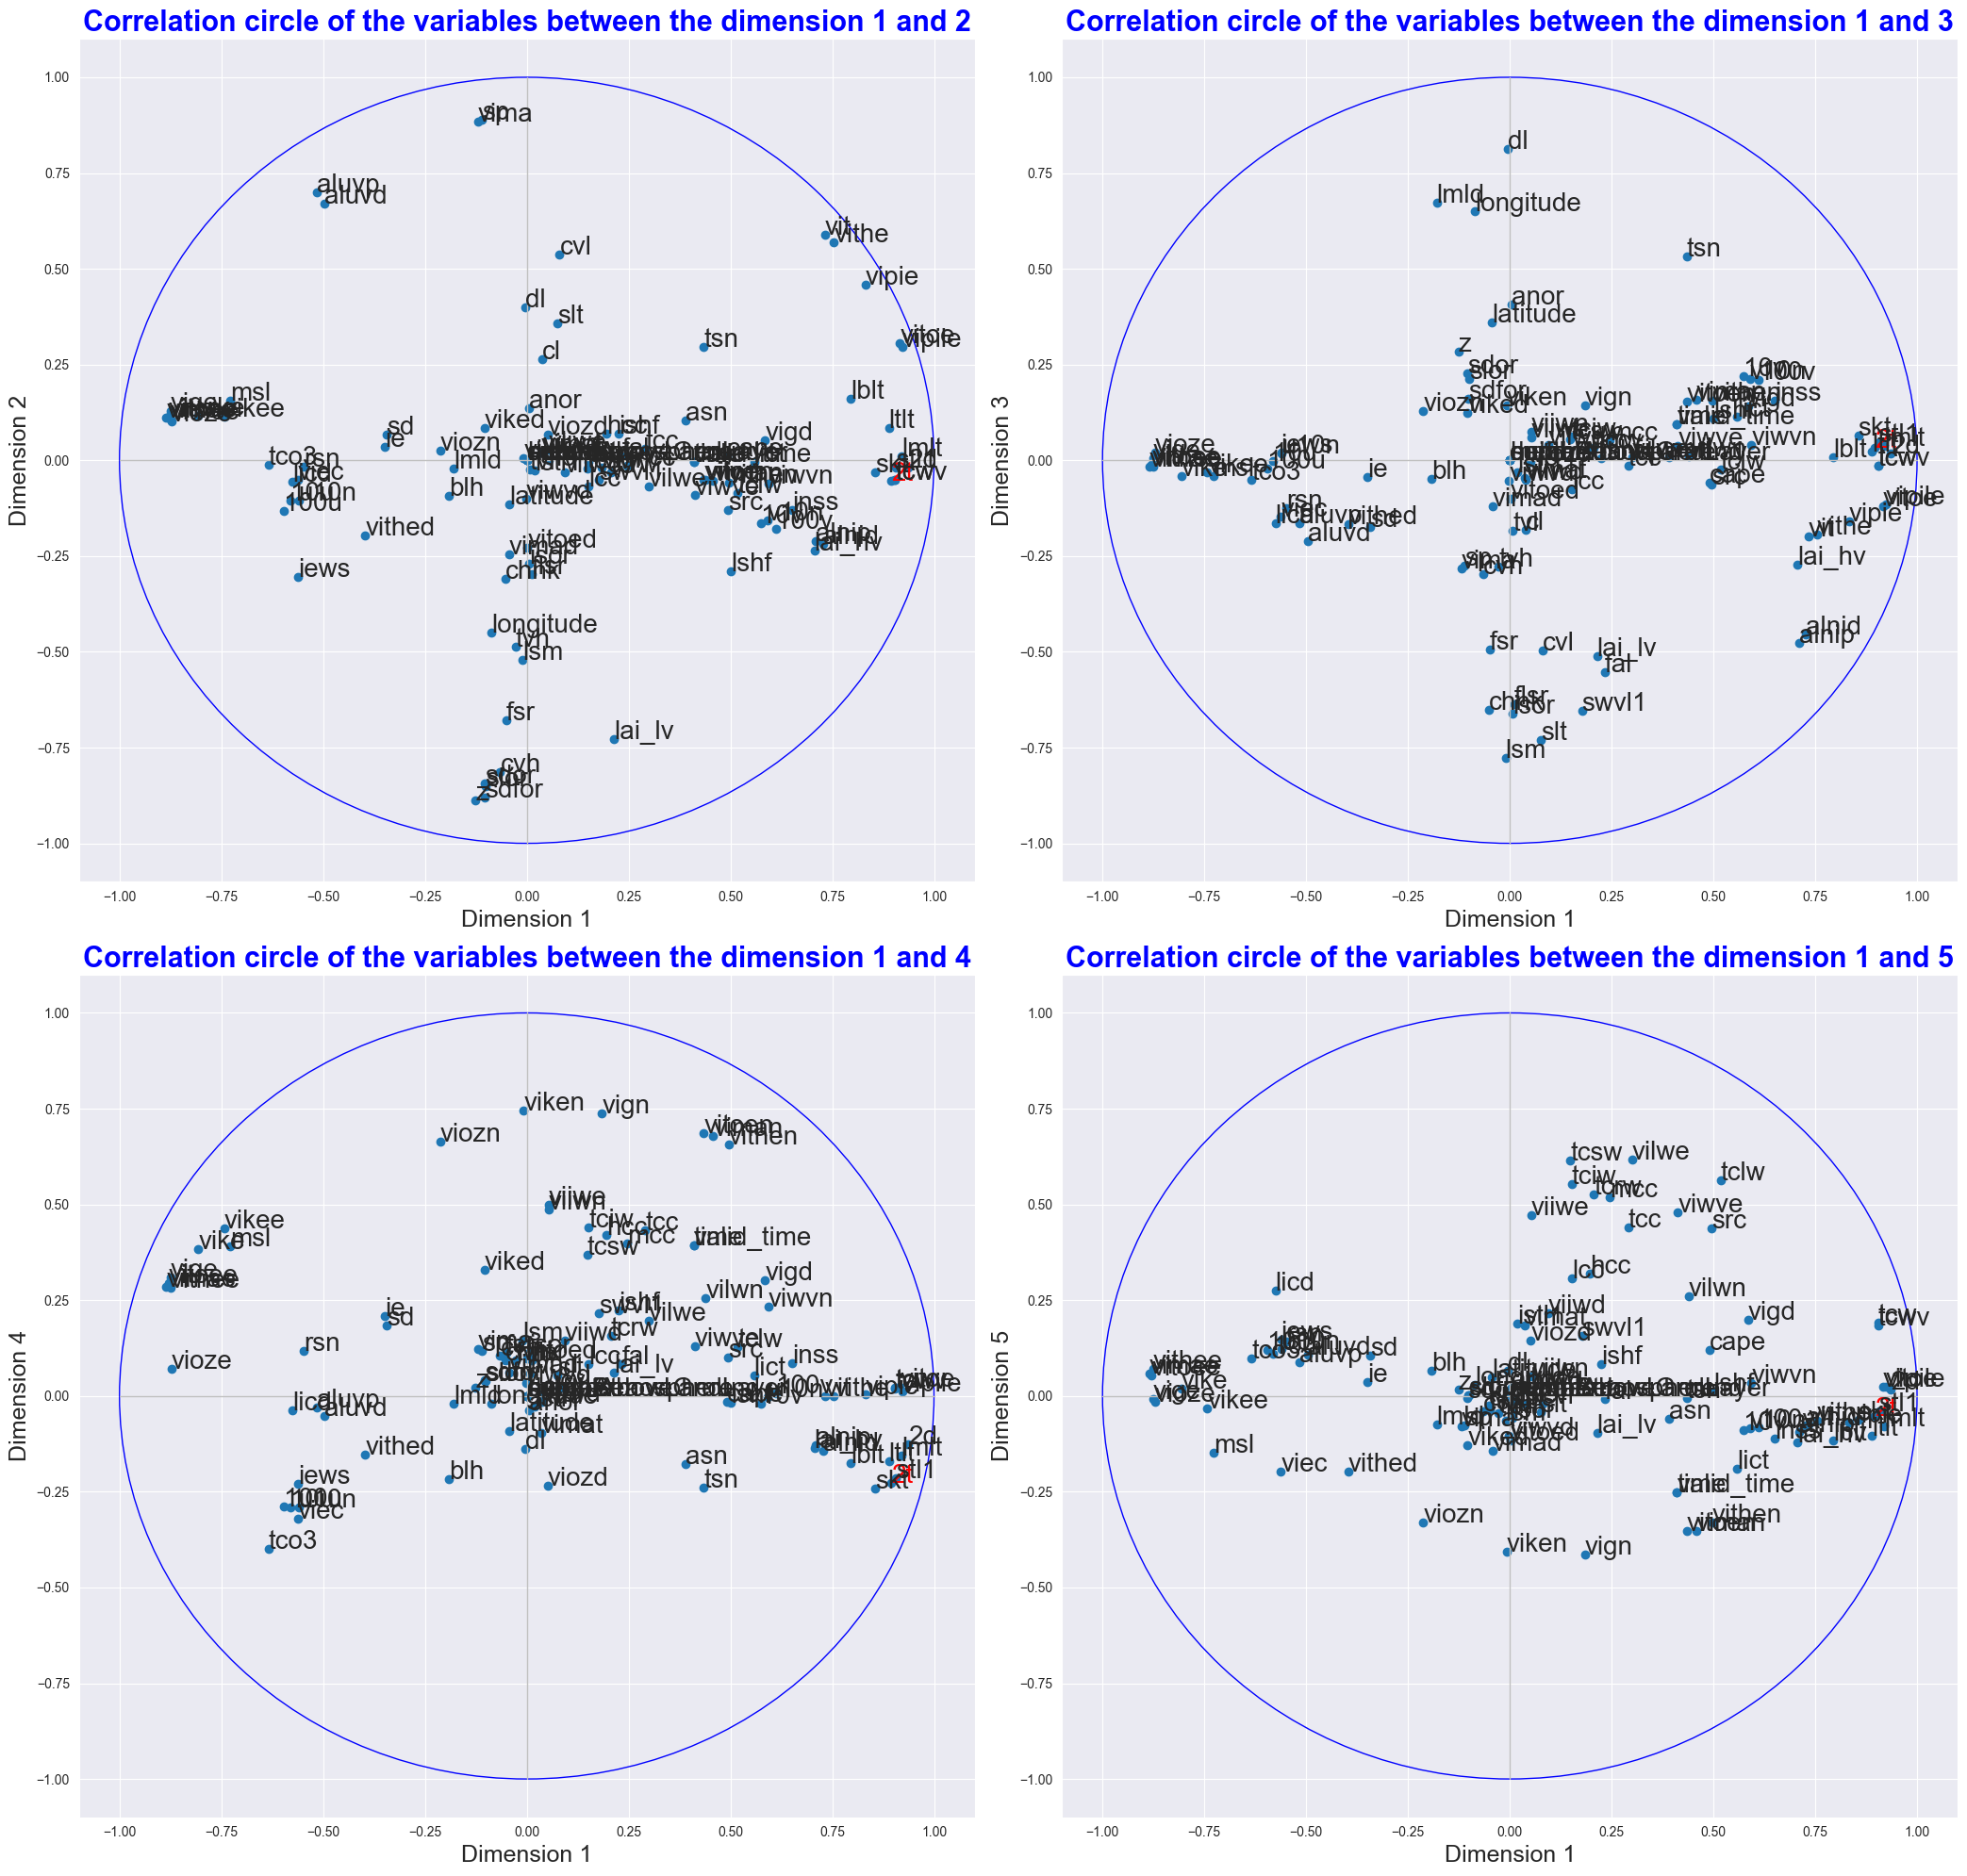

In [35]:
corvar = np.zeros((len(clean_df_scale.columns), (len(clean_df_scale.columns))))
for k in range(acp.n_components_):
    corvar[:,k] = vp_mat[:,k] * sqrt_eigval[k]
corvar_f = corvar[:, 0:2]
ctrvar = corvar**2
for j in range(acp.n_components_):
    ctrvar[:,j]=ctrvar[:,j]/valpropre[j]

ctrvar_df = pd.DataFrame(ctrvar[:,0:2], columns=['Contribution on Axis 1', 'Contribution on Axis 2'],index=clean_df_scale.columns)

import math
cols = 2
rows = math.ceil( (nb_composante - 1) / cols)
fig, axes = plt.subplots(rows, cols, figsize=(21, 20))

row = 0
col = -1

for dim in range(1, nb_composante):
    col += 1
    # les points
    axes[row][col].scatter(corvar[:,0],corvar[:,dim])
    axes[row][col].set_title(f'Correlation circle of the variables between the dimension 1 and {dim+1}', fontsize=22, color= 'blue', fontweight='bold')
    axes[row][col].set_xlabel(f'Dimension 1', fontsize=18)
    axes[row][col].set_ylabel(f'Dimension {dim+1}', fontsize=18)

    # affichage des étiquettes (noms des variables)
    for j in range((len(clean_df_scale.columns))):
        if clean_df_scale.columns[j] == '2t':
            axes[row][col].annotate(clean_df_scale.columns[j],(corvar[j,0],corvar[j, dim]), fontsize= 20, color='red')
        else:
            axes[row][col].annotate(clean_df_scale.columns[j],(corvar[j,0],corvar[j, dim]), fontsize= 20)

    # ajouter les axes
    axes[row][col].plot([-1,1],[0,0],color='silver',linestyle='-',linewidth=1)
    axes[row][col].plot([0,0],[-1,1],color='silver',linestyle='-',linewidth=1)

    # ajouter le cercle
    cercle = plt.Circle((0,0),1,color='blue',fill=False)
    axes[row][col].add_artist(cercle)
    if col % cols == cols - 1:
        col = -1
        row += 1

# affichage
fig.tight_layout()

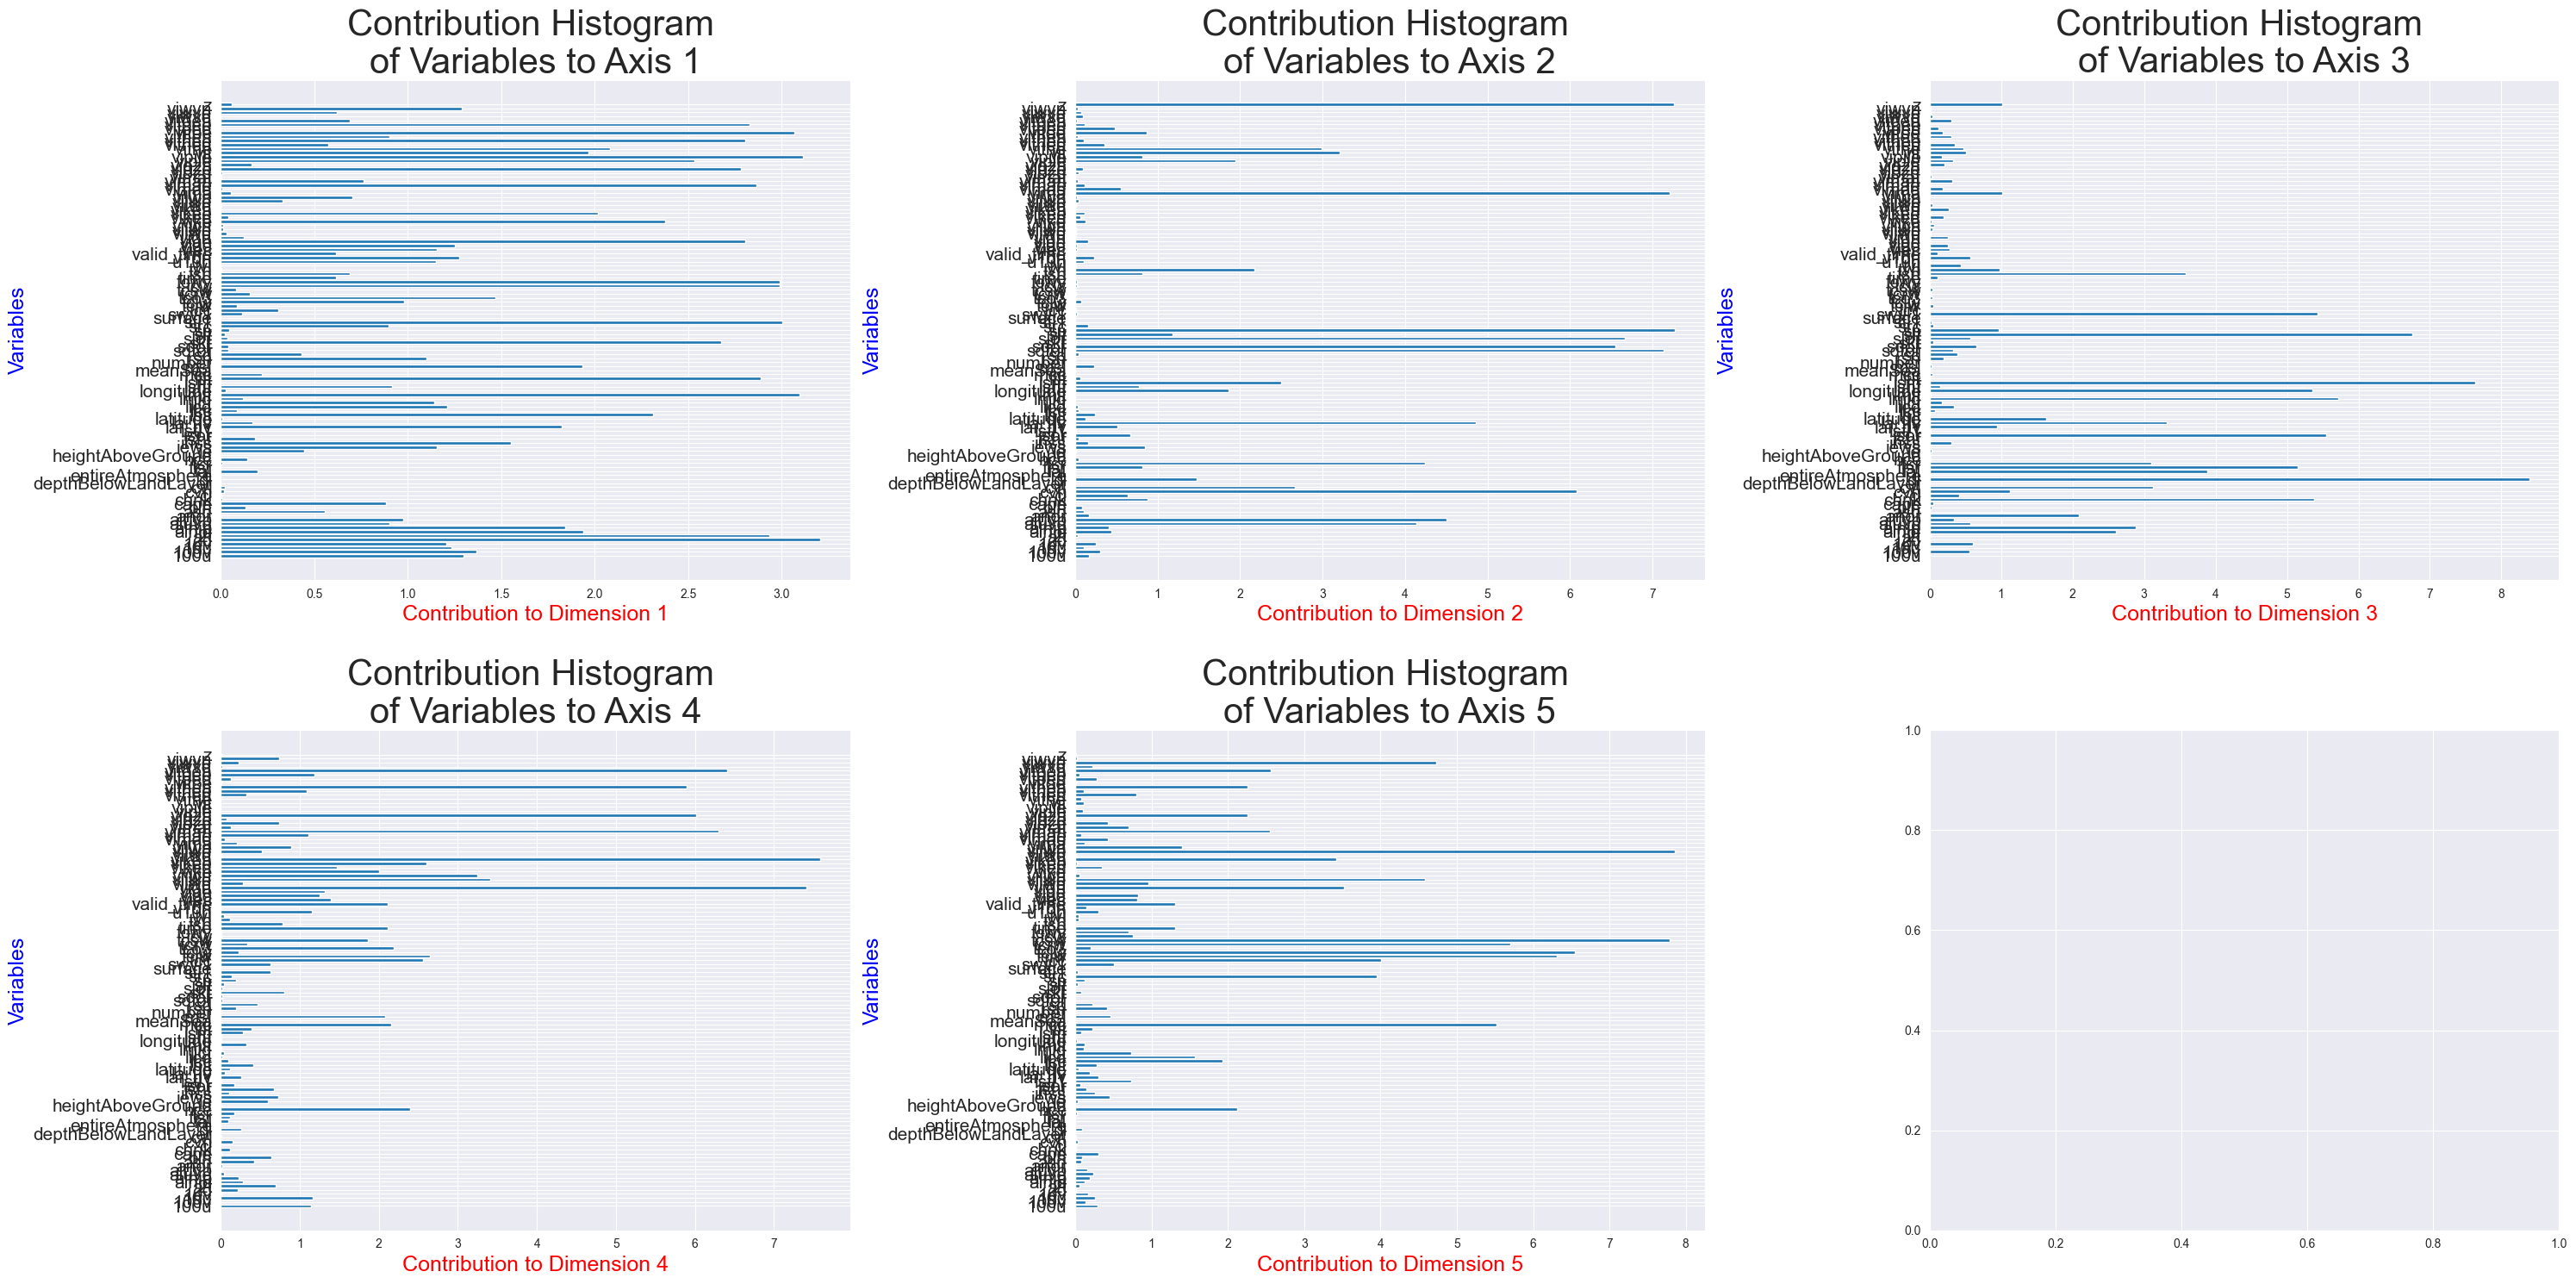

In [34]:
# Contributions of variables to the axes
ctrvar = corvar**2
for j in range(len(clean_df_scale.columns)):
    ctrvar[:, j] = ctrvar[:, j] / eig[j] * 100
var_contrib_df = pd.DataFrame({f'CTR_{acp_dim+1}': ctrvar[:, acp_dim] for acp_dim in range(nb_composante)}, index=clean_df_scale.columns)

cols = 3
rows = math.ceil((nb_composante - 1) / cols)
fig, axes = plt.subplots(rows, cols, figsize=(30, 15))

row = 0
col = -1
num_var = np.arange(len(var_contrib_df))

for contrib in range(len(var_contrib_df.columns)):
    col += 1
    # plotting points
    axes[row][col].barh(num_var, var_contrib_df[f'CTR_{contrib+1}'], align='center')
    axes[row][col].set_yticks(num_var)
    axes[row][col].set_yticklabels(var_contrib_df.index, fontsize=15)
    axes[row][col].set_title(f'Contribution Histogram \nof Variables to Axis {contrib+1}', fontsize=30)
    axes[row][col].set_xlabel(f'Contribution to Dimension {contrib+1}', fontsize=18, color='red')
    axes[row][col].set_ylabel('Variables', fontsize=18, color='blue')
    if col % cols == cols - 1:
        col = -1
        row += 1

fig.tight_layout()
plt.subplots_adjust(hspace=.3)


In [112]:
clean_df_nt = clean_df_scale[clean_df_scale.columns.difference(['time', 'valid_time'] + nt_variables.shortName.tolist())]

clean_df_nt

,100u,100v,10u,10v,alnid,alnip,aluvd,aluvp,anor,asn,...,vithee,vithen,vitoe,vitoed,vitoee,vitoen,viwvd,viwve,viwvn,z
0,-0.925100,-0.109040,-0.894748,-0.023890,-0.521331,-0.312179,1.415344,1.598680,-0.455995,0.312311,...,0.271339,-0.900804,-0.455988,-0.591454,0.285274,-0.865890,-0.458096,-0.624135,-0.418119,-0.775894
1,-0.751501,0.001080,-0.765096,0.030351,-0.867684,-0.712984,0.655215,0.822316,-0.243982,0.312311,...,0.250519,-0.882892,-0.756612,-0.367230,0.268767,-0.856035,-0.550063,-0.654457,-0.396899,-0.059116
2,-0.622782,0.041009,-0.588172,0.024172,-1.150464,-1.051152,0.092290,0.227356,0.710765,0.312311,...,0.231043,-0.860934,-0.884433,0.521457,0.253223,-0.842896,-0.566617,-0.687695,-0.372441,0.192615
3,-0.595978,0.246117,-0.535749,0.241820,-1.229331,-1.160857,-0.173038,-0.061877,0.735572,0.312311,...,0.213245,-0.833777,-0.970187,0.480409,0.239246,-0.825596,-0.534429,-0.719184,-0.347983,0.310090
4,-0.520554,0.464676,-0.515155,0.383257,-1.211338,-1.168460,-0.282994,-0.220449,-0.343675,0.312311,...,0.194441,-0.801419,-1.212239,-1.645871,0.224546,-0.803916,-0.424988,-0.747174,-0.328201,0.841797
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7771,0.364565,-0.847784,0.465142,-1.006634,-0.748156,-0.611643,-0.058397,0.107373,-0.382856,-0.873577,...,1.657662,1.852936,-0.928155,1.880757,1.640099,1.998959,0.200892,0.347978,-0.065818,0.595229
7772,0.197199,-1.374846,0.207244,-1.452230,-0.504359,-0.362905,0.692170,0.845680,-0.163438,-0.179658,...,1.652289,1.835168,-0.471879,1.013107,1.635882,1.986039,0.041789,0.369262,-0.058984,-0.548539
7773,0.077518,-1.522793,0.089762,-1.592980,-0.562235,-0.447266,0.167490,0.323030,1.765243,0.181726,...,1.636842,1.833146,-0.447609,-0.574419,1.624435,1.983849,0.169623,0.396669,-0.049453,-0.553519
7774,0.142033,-1.210087,0.201159,-1.266164,-0.658794,-0.541402,-0.124131,0.035064,2.357582,0.194253,...,1.631638,1.842391,-0.536276,-1.124461,1.620820,1.989105,0.218365,0.422326,-0.040281,-0.313697


In [105]:
correlation_matrix = clean_df_nt.corr()
temperature_correlations = correlation_matrix['2t']

KeyError: '2t'

In [57]:
temperature_correlations.apply(lambda r: np.sqrt(r**2)).sort_values(ascending=False)

t2m                  1.000000
p65.162              0.835240
p75.162              0.825861
msl                  0.824366
p69.162              0.823459
                       ...   
entireAtmosphere          NaN
heightAboveGround         NaN
meanSea                   NaN
number                    NaN
surface                   NaN
Name: t2m, Length: 102, dtype: float64

In [41]:
from sklearn.ensemble import RandomForestRegressor

# Assuming 'temperature' is your target variable
X = clean_df_nt.drop('t2m', axis=1)
y = clean_df_nt['t2m']

model = RandomForestRegressor()
model.fit(X, y)

RandomForestRegressor()

In [42]:
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.sort_values(ascending=False)

tcwv                   0.667428
p73.162                0.109655
tcw                    0.052014
blh                    0.032306
ie                     0.030877
                         ...   
entireAtmosphere       0.000000
p87.162                0.000000
depthBelowLandLayer    0.000000
surface                0.000000
heightAboveGround      0.000000
Length: 101, dtype: float64